# Support Vector Regressor Implementation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing Dataset

In [2]:
from sklearn.datasets import make_regression

In [3]:
X,y = make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [5]:
pd.DataFrame(X)

,0,1
0,2.128109,-0.318904
1,-0.952529,-0.167926
2,-1.338381,-0.232240
3,1.463754,-0.069703
4,-0.099120,0.463433
...,...,...
995,0.412653,-0.061864
996,0.308049,0.596760
997,-1.085697,0.379734
998,-0.610162,-1.408461


In [6]:
pd.DataFrame(y)

,0
0,121.507972
1,-79.246301
2,-115.431267
3,108.696197
4,26.475032
...,...
995,25.371407
996,68.197350
997,-52.795731
998,-157.689686


#### Scatter Plot

<AxesSubplot:xlabel='0', ylabel='1'>

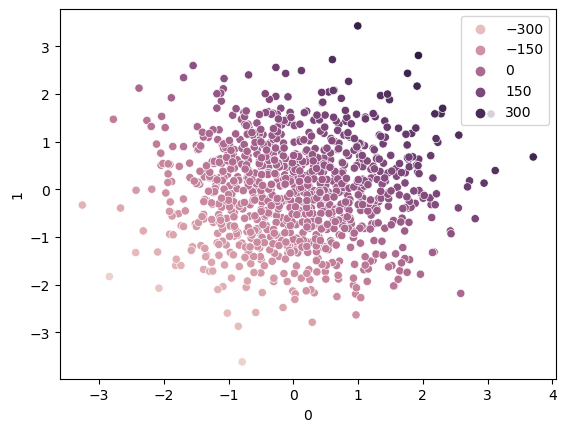

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

#### Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

#### SVR Model

In [11]:
from sklearn.svm import SVR

In [12]:
svr = SVR(kernel='linear')

In [13]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [14]:
svr.coef_

array([[72.7190646 , 83.27743108]])

In [18]:
y_pred = svr.predict(X_test)

#### Accuracy

In [16]:
from sklearn.metrics import r2_score

In [19]:
r2_score(y_test,y_pred)

0.9992784948555229

### SVR - Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

In [22]:
parameters = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear'],
    'epsilon':[0.1,0.2,0.3]
}

In [23]:
grid = GridSearchCV(SVR(),param_grid=parameters,scoring='neg_mean_squared_error',refit=True,cv=5,verbose=3)

In [24]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-3849.421 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-4866.906 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-4199.110 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-3890.163 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-4085.368 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-3849.421 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-4866.906 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-4199.110 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-3890.163 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-4085.368 total time=   0.0

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [25]:
grid.best_params_

{'C': 100, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [26]:
#Prediction
y_pred1 = grid.predict(X_test)

In [27]:
print(r2_score(y_test,y_pred1))

0.999330718674616
